### Task A

In [1]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices

%pylab inline
import re
import string

Populating the interactive namespace from numpy and matplotlib


In [90]:
#comments are coming in as utf-8 so I am using this code to change it back to ascii
def unicodetoascii(text):

    TEXT = (text.
    		replace('\xe2\x80\x99', "'").
            replace('\xc3\xa9', 'e').
            replace('\xe2\x80\x90', '-').
            replace('\xe2\x80\x91', '-').
            replace('\xe2\x80\x92', '-').
            replace('\xe2\x80\x93', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x94', '-').
            replace('\xe2\x80\x98', "'").
            replace('\xe2\x80\x9b', "'").
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9c', '"').
            replace('\xe2\x80\x9d', '"').
            replace('\xe2\x80\x9e', '"').
            replace('\xe2\x80\x9f', '"').
            replace('\xe2\x80\xa6', '...').#
            replace('\xe2\x80\xb2', "'").
            replace('\xe2\x80\xb3', "'").
            replace('\xe2\x80\xb4', "'").
            replace('\xe2\x80\xb5', "'").
            replace('\xe2\x80\xb6', "'").
            replace('\xe2\x80\xb7', "'").
            replace('\xe2\x81\xba', "+").
            replace('\xe2\x81\xbb', "-").
            replace('\xe2\x81\xbc', "=").
            replace('\xe2\x81\xbd', "(").
            replace('\xe2\x81\xbe', ")")

                 )
    return TEXT

In [91]:
data = pd.read_csv('final.csv', sep=',',names=['id', 'date','user','text'])

In [92]:
data.drop(data.index[:1], inplace=True)

In [93]:
data[:5]

,id,date,user,text
1,0.0,September 7,dino001,If they keep it around in next four-five years...
2,1.0,September 7,circlew,The lease rate is the factor that stops me col...
3,2.0,September 8,qbrozen,"Yes, the completely noncomparable M2 would bea..."
4,3.0,September 9,FlightNurse2,Why not a Genesis G70 with a manual?
5,4.0,September 9,roadburner,"Again, the local dealer are hopeless at best(W..."


In [94]:
#text field is the comments field
#unicodetoascii changes the form from unicoding to regular english
#making all the comments lower case
#dt = data.iloc[:50]
text = data['text']
text = text.map(lambda a: unicodetoascii(str(a)))
text = text.map(lambda a: a.lower())

#text= text.map(lambda a: str(a).decode('ascii', errors='ignore'))
#text_18 = text.loc[18]

#text_18 = text_18.decode("ascii", errors="ignore")
#text_18

In [95]:
models = pd.read_csv('models.csv', sep=',',names=['brand','model'],encoding='windows-1252')
models_revised = pd.read_csv('models_revised.csv', sep=',',names=['brand','model'],encoding='windows-1252')

In [96]:
#this text is also in unicode so just replacing one of the symbols with a space 
#(we can also call the unicodetoascii function here for more robust cleaning)
#making the model names lowercase
models.model = models['model'].map(lambda x: x.replace('\xa0', ''))
models.model = models['model'].map(lambda x: x.lower())
models_revised.model = models_revised['model'].map(lambda x: x.replace('\xa0', ''))
models_revised.model = models_revised['model'].map(lambda x: x.lower())

In [97]:
#create dictionary {model: brand}
#this will be used when locating when the model is written, and replacing it to the brand name
brand_dict = {}
for i in range(len(models_revised)):
    brand_dict[models_revised['model'][i]] = models_revised['brand'][i]

In [98]:
#replace all models with brand names


#for key in brand_dict.iterkeys():
 #   dt['text'] = dt['text'].map(lambda x: x.replace(key, brand_dict[key]))
    
#dt['text']
#for key in brand_dict.iterkeys():
#    text_18 = text_18.replace(key, brand_dict[key])
#text_18

def replace(match):
    return brand_dict[match.group(0)]

text = text.map(lambda x: re.sub('|'.join(r'%s' % re.escape(s) for s in brand_dict), 
        replace, x) )

#text_18 =  re.sub('|'.join(r'\b%s' % re.escape(s) for s in brand_dict), 
#        replace, text_18) 

In [99]:
#finding all of the unique/different brand names
brand = list(set(models_revised.brand))

In [100]:
#findall: takes each comment separately, finds every time any brand is mentioned, and adds it to the master list
#set(ls): this makes sure that even if the brand is mentioned more than once, it is only recorded once
master_list = []

def findall(w):
    ls = []
    ls = [e for e in brand for i in w.split() if e in i] #this line finds where the brand is mentioned in the comment (could be
    # of any format: ex. "honda."| "honda's" | "honda-and" | etc., and records it as just "honda")
    ls = list(set(ls))
    master_list.append(ls) #this stores all the mentions of every comment we have
text.map(findall)

count_list = sum(master_list)

brand_mention_doc = master_list

In [13]:
count_series = pd.Series(count_list).value_counts()
count_series[:10]

bmw           532
toyota        504
audi          460
honda         246
acura         217
chrysler      150
volkswagen    121
infiniti      106
hyundai       103
cadillac       98
dtype: int64

In [14]:
from collections import Counter
#counts the number of mentions each brand has and displays the top 10

counts = Counter(count_list)
counts.most_common(10)

[('bmw', 532),
 ('toyota', 504),
 ('audi', 460),
 ('honda', 246),
 ('acura', 217),
 ('chrysler', 150),
 ('volkswagen', 121),
 ('infiniti', 106),
 ('hyundai', 103),
 ('cadillac', 98)]

In [15]:
#list = []
#list = [i for e in brand for i in text_18.split() if e in i]
#for b in brand:
#    for c in list:
#        if re.search(b , c):
#            list = [word.replace(c,b) for word in list]
#set(list)

In [16]:
#def ratio(a, b):
#    a = float(a)
#    b = float(b)
#    if b == 0:
#        return a
#    return ratio(b, a % b)

#def get_ratio(a, b):
#    r = ratio(a, b)
#    return "%s" % float((a/r) / (b/r))

In [17]:
master_list = list(filter(None,master_list))

In [18]:
def co_occur(car1, car2):
    freq = 0
    for i in range(len(master_list)):
        if (car1 in master_list[i]) & (car2 in master_list[i]):
            freq += 1
    return freq

def lift(car1, car2):
    return (float(len(text)) * float(co_occur(car1, car2))) / (float(count_series.loc[car1]) * float(count_series.loc[car2]))

In [19]:
top_10_brand = list(count_series[:10].index.values)


from itertools import combinations

for combo in combinations(list(count_series[:10].index.values), 2):
    print(combo,lift(combo[0],combo[1]))

('bmw', 'toyota') 1.5777949337629789
('bmw', 'audi') 1.999476953252697
('bmw', 'honda') 1.713643865761966
('bmw', 'acura') 1.2803870274765254
('bmw', 'chrysler') 0.5748496240601504
('bmw', 'volkswagen') 0.8709842788790157
('bmw', 'infiniti') 1.4461625762519505
('bmw', 'hyundai') 1.7673370319001387
('bmw', 'cadillac') 1.8575072886297377
('toyota', 'audi') 1.8027691511387163
('toyota', 'honda') 2.795489740611692
('toyota', 'acura') 1.2583113890717577
('toyota', 'chrysler') 2.2248809523809525
('toyota', 'volkswagen') 2.0059031877213696
('toyota', 'infiniti') 1.8127246181491465
('toyota', 'hyundai') 2.061893203883495
('toyota', 'cadillac') 2.063896987366375
('audi', 'honda') 1.6215270413573701
('audi', 'acura') 2.1446002805049087
('audi', 'chrysler') 1.699
('audi', 'volkswagen') 4.029249011857708
('audi', 'infiniti') 4.285828547990156
('audi', 'hyundai') 1.7212325875897003
('audi', 'cadillac') 2.035181898846495
('honda', 'acura') 5.346970889063729
('honda', 'chrysler') 5.939593495934959
('

In [20]:
dist_list = []
for car1 in top_10_brand:
    group_dist=[]
    for car2 in top_10_brand:
        if (lift(car1, car2) != 0) & (car1 != car2):
            group_dist.append(1/lift(car1, car2))
        elif (lift(car1, car2) != 0) & (car1 == car2):
            group_dist.append(0.0)
        else:
            group_dist.append(4.0)
    dist_list.append(group_dist)

/Users/chunhsiangchang/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


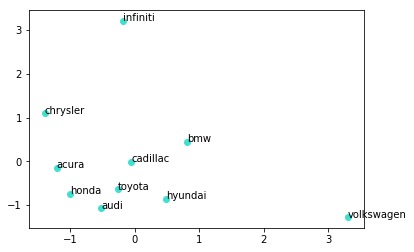

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds = MDS(n_components=2)
pos = mds.fit(dist_list).embedding_
fig, ax = plt.subplots()
ax.scatter(pos[:, 0], pos[:, 1], color='turquoise')
for i, txt in enumerate(top_10_brand):
    ax.annotate(txt, (pos[:, 0][i], pos[:, 1][i]))

### Task C

1. Find the words that are mentioned the most. 

In [34]:
from nltk import word_tokenize
from string import punctuation

def preprocess(x):
    lowercase= x.lower()
    for p in punctuation:
        lowercase = lowercase.replace(p,'')
    return lowercase

token = text.map(preprocess).map(word_tokenize)

In [26]:
token[:5]

1    [if, they, keep, it, around, in, next, fourfiv...
2    [the, lease, rate, is, the, factor, that, stop...
3    [yes, the, completely, noncomparable, m2, woul...
4         [why, not, a, hyundai, g70, with, a, manual]
5    [again, the, local, dealer, are, hopeless, at,...
Name: text, dtype: object

In [35]:
import nltk
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))

filtered_sentence = [] 

def remove_stopwords(x):
    for w in x: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
token.map(remove_stopwords)
pos_tagging = nltk.pos_tag(filtered_sentence)

In [38]:
pos_tagging[:5]

[('keep', 'VB'),
 ('around', 'IN'),
 ('next', 'JJ'),
 ('fourfive', 'JJ'),
 ('years', 'NNS')]

In [37]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
l = []
for word, tag in pos_tagging:
    wntag = get_wordnet_pos(tag)
    if wntag is None:
        lemma = lemmatizer.lemmatize(word)
        l.append(lemma)
    else:
        lemma = lemmatizer.lemmatize(word, pos=wntag) 
        l.append(lemma)

words_value_counts = pd.Series(l).value_counts()
words_value_counts.to_csv('Word_counts.csv')

2. Lemmatize every message. 

In [40]:
token_pos = token.map(nltk.pos_tag) ## Tokennize all text in order to match

In [41]:
def lemm_msg(x):
    msg_l = []
    for word, tag in x:
        wntag = get_wordnet_pos(tag)
        if wntag is None:
            lemma = lemmatizer.lemmatize(word)
            msg_l.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, pos=wntag) 
            msg_l.append(lemma)
    return msg_l

token_lemm = pd.Series(token_pos).map(lemm_msg)

In [42]:
token_lemm[1]

['if',
 'they',
 'keep',
 'it',
 'around',
 'in',
 'next',
 'fourfive',
 'year',
 'i',
 'think',
 'i',
 'will',
 'make',
 'myself',
 'to',
 'put',
 'on',
 'a',
 'hazmat',
 'suit',
 'and',
 'visit',
 'our',
 'friendly',
 'kia',
 'dealer',
 'oh',
 'boy',
 'be',
 'they',
 'horrible',
 'here',
 'or',
 'what',
 'to',
 'check',
 'it',
 'out',
 'it',
 'get',
 'a',
 'lot',
 'of',
 'good',
 'stuff',
 'but',
 'seem',
 'like',
 'they',
 'be',
 'still',
 'behind',
 'on',
 'a',
 'few',
 'thing',
 'such',
 'a',
 'relationship',
 'between',
 'power',
 'and',
 'gas',
 'mileage',
 'eg',
 'bmw',
 '340440',
 'have',
 'similar',
 'performance',
 'but',
 'much',
 'good',
 'gas',
 'mileage',
 'a',
 'a',
 'daily',
 'driver',
 'but',
 'with',
 'appropriate',
 'price',
 'difference',
 'those',
 'objection',
 'and',
 'shortcoming',
 'be',
 'not',
 'insurmountable',
 'big',
 'thing',
 'will',
 'be',
 'the',
 'first',
 'contact',
 'with',
 'a',
 'sale',
 'person',
 'hope',
 'it',
 'wont',
 'start',
 'from',
 'be'

In [44]:
def list_to_sring(x):
    return ' '.join(x)
text_lemm = token_lemm.map(list_to_sring)

In [45]:
att = pd.read_csv('att.csv', sep = ',',names=['attribute','word'], encoding='windows-1252')
att.word = att['word'].map(lambda x: x.replace('\xa0', ''))
att.word = att['word'].map(lambda x: x.lower())

In [53]:
text_lemm

1       if they keep it around in next fourfive year i...
2       the lease rate be the factor that stop me cold...
3       yes the completely noncomparable m2 would beat...
4                     why not a hyundai g70 with a manual
5       again the local dealer be hopeless at bestwhat...
6       be you talk about hyundai dealer or hyundia de...
7       thanks but i be more than aware of the dtoyota...
8       yeah i go once to an autonation lexus store it...
9       i be the poster formerly know a benjaminh and ...
10      still on the ltoyota just have not be look act...
11                                   i send you a message
12      a new and mostly positive review by kelly blue...
13      if i do manage to upgrade to a tchrysler it wo...
14      thanks ill give it a try at some point to merg...
15      im not sure if id have the patience and discip...
16      they usually go up a the year go along chrtoyo...
17      yeah i be and be a bit concerned with get two ...
18      the kt

In [47]:
att_dict = {}
for i in range(len(att)):
    att_dict[att['word'][i]] = att['attribute'][i]

In [48]:
def replace_att(x):
    return att_dict[x.group(0)]

text_att = text_lemm.map(lambda x: re.sub('|'.join(r'%s' % re.escape(s) for s in att_dict), 
        replace_att, x) )

In [49]:
top_5_brand = list(count_series[:5].index.values)
attribute_list = list(att['attribute'].unique())
co_occur_list = top_5_brand + attribute_list
master_list_att = []

def findall_att(w):
    ls = []
    ls = [e for e in co_occur_list for i in w.split() if e in i]
    ls = list(set(ls))
    master_list_att.append(ls)
text_att.map(findall_att)

#master_list_att = list(filter(None,master_list_att))
count_list_att = sum(master_list_att)
count_series_att = pd.Series(count_list_att).value_counts()

In [50]:
count_series_att

duration       1022
performance     759
price           611
design          598
bmw             532
toyota          504
audi            460
size            276
honda           246
acura           217
dtype: int64

In [51]:
def co_occur_att(car, att):
    freq = 0
    for i in range(len(master_list_att)):
        if (car in master_list_att[i]) & (att in master_list_att[i]):
            freq += 1
    return freq

def lift_att(car, att):
    return (float(len(text_att)) * float(co_occur_att(car, att))) / (float(count_series_att.loc[car]) * float(count_series_att.loc[att]))

In [52]:
for brand in top_5_brand:
    for attribute in attribute_list:
        print(brand, attribute, lift_att(brand, attribute))

bmw size 1.9092227852239294
bmw performance 1.7040996760676395
bmw design 1.8584881937284683
bmw price 1.991432140088355
bmw duration 1.7905459588305401
toyota size 2.2717822636300897
toyota performance 2.025283894849112
toyota design 2.1477643733078517
toyota price 2.019308705478918
toyota duration 1.969183906439288
audi size 2.087618147448015
audi performance 1.8832359511943633
audi design 2.316144394358005
audi price 1.614007685191774
audi duration 1.5070258657364077
honda size 2.7025450689289503
honda performance 2.1292779330955365
honda design 2.148176849661473
honda price 1.8990060277034848
honda duration 2.0476230251539307
acura size 2.297786014826688
acura performance 1.7639569406750333
acura design 2.003198064207882
acura price 1.8452487800463093
acura duration 1.9535427958191673


### Task D

### BMW:
Surprisingly, BMW has low lift on most of the 5 attributes except price. It can be caused by the users on online-forum are younger and couldn't afford a BMW.
### Toyota:
By having a comparatively high lift on all attributes, it seems that Toyota serves as a benchmark in discussions on attributes. People like to compare the dicussion between buying a car under dicussion with buying a Toyota. Which suggest the prevalence of Toyota because of the relatively good quality given the price.
### Audi:
Having the highest lift on design among the five brands. Audi has an advantage on attracting people's eyeballs by how the car looks.
### Honda: 
It seems that people are more concerned on the size of Honda's car and how long could the car be drive with little maintenance. Therefore, size and duration are the attributes Honda needs to emphasize on its commercials.
### Acura:
People talk more about Acura's size and design, which seems to be the strength of the brand. However, Acura should notice Edmunds user are talking less about the Acura's performance, which could be its weakness.

### Task E

In task E, we first define a list of "aspiring words". Next, we searched if any of the "aspiring words" appear in the lemmatized, stop word removed text. Then, we find three words in both the front and the end of the "aspiring word" found, and check if any brand names in these six words. If brand name found, we found an incidence of expressing asipiration to a brand.

In [58]:
from nltk.stem import snowball
import string
stop_w = set(stopwords.words('english'))

In [61]:
def remove_stop_words(tokens):
    return([w for w in tokens if not w in stop_w])

In [64]:
#removing stop words from the token of lemmantized comments
token_lem_s_removed = token_lemm.map(remove_stop_words)

In [67]:
aspiring_words = ["want", "dream", "hope", "wish", "aspire"]

In [103]:
master_list_aspiring = []
for index, brand_mentioned in enumerate(brand_mention_doc):
    
    #for each text, create an dictionary of mentioned {brand : list of asipiring words} 
    brand_attribute_dict = {}
    if brand_mentioned:
        for word_index, word in enumerate(token_lem_s_removed.iloc[index]):
            
            if word in aspiring_words:
                #This creates a list of length 7 having the attribute word in the midle
                vicinity_word_list = token_lem_s_removed.iloc[index][word_index-3 : word_index+4] 
                for brand in brand_mentioned:
                    
                    if brand in vicinity_word_list:
                        #Find the index of the brand in our text token list
                        brand_index = vicinity_word_list.index(brand)
                        #Check if there is period between found aspiration word and brand
                        if (brand_index > 3 ) and ("." in vicinity_word_list[3 : brand_index]):
                            continue
                        elif (brand_index < 3) and ("." in vicinity_word_list[brand_index : 3]):
                            continue
                        else:
                            if brand not in brand_attribute_dict:
                                brand_attribute_dict[brand] = [word]
                            else:
                                brand_attribute_dict[brand].append(word)
                                                                                      
    master_list_aspiring.append(brand_attribute_dict)
            

In [135]:
master_list_aspiring_f = list(filter(None,master_list_aspiring))
master_list_aspiring_f[:5]

[{'honda': ['wish']},
 {'cadillac': ['want']},
 {'kia': ['want']},
 {'kia': ['want'], 'hyundai': ['want']},
 {'kia': ['hope']}]

In [129]:
#Turn the found pairs of brand and aspiration words to Pandas Series 
brands_aspire_count_dict = {}
for i in master_list_aspiring_f:
    for j in i.keys():
        if j not in brands_aspire_count_dict:
            brands_aspire_count_dict[j] = 1
        else:
            brands_aspire_count_dict[j] += 1

In [136]:
pd.Series(brands_aspire_count_dict).sort_values(ascending = False)[:5]

bmw         11
audi         7
toyota       6
infiniti     5
honda        4
dtype: int64

Generally speaking, the most aspirational brand on Edmunds is BMW. However, we can find from the lift analysis in Task C, people aren't talking about BMW's car attributes a lot. Which implicates BMW has formed a good image among Edmunds users, but has created little surprise and discussion on its car attributes.